In [1]:
import numpy as np
import torch
%matplotlib inline


In [2]:
# from array to torch tensor

data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)


In [3]:
# from numpy array to torch tensor
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")


Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



In [ ]:
# tensor to tensor

x_ones = torch.ones_like(x_data)  # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

# overrides the datatype of x_data
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")


In [ ]:
# elementwise multiplication: * == mul
# matrix multiplication: @ == matmul
# in place operation: add_, sub_, mul_, div_, etc.


In [4]:
# fashion MNIST

import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor, Lambda
from torchvision import datasets
from torch.utils.data import Dataset
import torch
%matplotlib inline

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



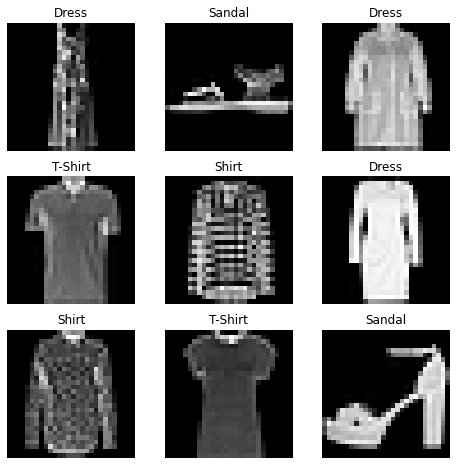

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


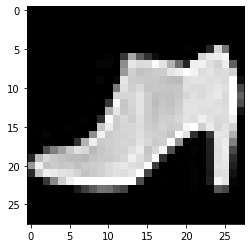

Label: 9


In [7]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


General notes

Activation function decides whether or not a neuron is activated and also introduces non-linearity.

Bias: (b). low bias -> network makes many assumptions about form of output. high bias vv

nn.Sequential(a,b,c) is an order container of modules. It is equivalent to:

class abc(nn.Module):
    def __init__(self):
        super(abc, self).__init__()
        self.a = a
        self.b = b
        self.c = c
    def forward(self,x):
        x = self.a(x)
        x = self.b(x)
        x = self.c(x)
        return x
